# Ejercicio 4 - Todos vamos a Morir

 Si encuentro un único individuo y conozco su edad, debo estimar la densidad de probabilidad que da la expectativa de vida de la población. Hay una cosa que se sabe a priori, la expectativa de vida no puede estar por debajo de la edad del individuo encontrado.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'PDF (Edad Maxima Posible|data)')

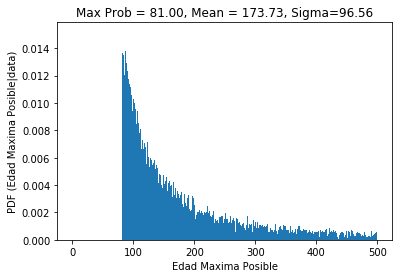

In [2]:
n_personas_obs = 2
edad_maxima_obs = 80

edad_final = np.arange(0, 500) #Futuros bins del histograma.
n_edades = len(edad_final)

n_intentos_por_edad = 10000

lista_edades_final = [] #De aquí se obtendrá el histograma.
for i in range(n_edades):
    for j in range(n_intentos_por_edad):
        #Se generan n_personas_obs aleatoriamente con edades entre 0 y edad_final[i]
        #y se evalúa si la edad máxima coincide con edad_maxima_obs. En el caso que sí
        #se agrega edad_final[i] a lista_edades_final, pues eso significa que es posible
        #que la edad de muerte sea edad_final[i].
        a = np.int_(np.random.uniform(low=0, 
                                      high=edad_final[i], 
                                      size=n_personas_obs))
        if(a.max()==edad_maxima_obs):
            lista_edades_final.append(edad_final[i])


#Funciones no importantes usadas para calcular valor más probable, media, sigma, usando la densidad
#que se obtiene del histograma (pdf_p_a).
def max_prob(p_a, pdf_p_a):
    ii = np.argmax(pdf_p_a)
    return p_a[ii]

def mean(p_a, pdf_p_a):
    return np.trapz(pdf_p_a*p_a, p_a)

def sigma(p_a, pdf_p_a):
    m = mean(p_a, pdf_p_a)
    s = np.trapz(pdf_p_a*p_a*p_a, p_a)
    return np.sqrt(s - m**2)




distro, bins,_ = plt.hist(lista_edades_final, bins=edad_final, density=True)

mp = max_prob(bins[:-1], distro)
m = mean(bins[:-1], distro)
sig = sigma(bins[:-1], distro)
values = 'Max Prob = {:.2f}, Mean = {:.2f}, Sigma={:.2f}'.format(mp, m, sig)
plt.title(values)
plt.xlabel('Edad Maxima Posible')
plt.ylabel('PDF (Edad Maxima Posible|data)')